In [4]:
import os 
import pandas as pd

import plotly.express as px
import plotly.io as pio
from IPython.display import HTML
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

ROOTDIR = '/Users/fgu/Library/Mobile Documents/com~apple~CloudDocs/fab/projects/limo'
DATADIR = os.path.join(ROOTDIR, 'data')

def merch(df, merch):
    return df[df.merch.str.contains(merch, na=False)]

def cat(df, cat):
    return df[df.cat.str.contains(cat, na=False)]

def month(df, ym):
    return df[df.ym.eq(ym)]

In [5]:
df = pd.read_parquet(os.path.join(DATADIR, 'clean.parquet'))

jul = month(df, '2020-07')
aug = month(df, '2020-08')

df.head(3)

,date,desc,cat,amount,merch,note,id,split,type,ym
0,2018-11-11 11:45:52,fgtofg,transfer,-200.00,gunzinger,fgtofg,tx_00009cegw7obs9iqehznxb,None,faster payment,2018-11-01
1,2018-11-11 11:52:40,p9811069,general,200.00,fabian gunzinger,p9811069,tx_00009ceh7gjc93f2z8ej7z,None,faster payment,2018-11-01
2,2018-11-18 16:19:23,waitrose london gbr,groceries,2.99,waitrose & partners,None,tx_00009ctawup6crg1smr9ul,None,card payment,2018-11-01


In [44]:
from code.read_budget import read_budget
from code.read_monzo import read_monzo

def make_data(ym):
    monzo = (
        read_monzo()
        .loc[lambda df: df.ym.eq(ym)]
        .rename(columns={'amount': 'actual'})
        .pivot_table(values='actual', index='cat', aggfunc='sum')
        .reset_index()
    ) 
    budget = read_budget()
    df = (
        monzo
        .merge(budget)
        .melt(id_vars=['cat'], var_name='var', value_name='amount')
    )
    return df
    

df = make_data('2020-08')
df

,cat,var,amount
0,bills,actual,792
1,eating out,actual,28.55
2,entertainment,actual,7.99
3,groceries,actual,723.51
4,health,actual,91.46
5,holidays,actual,822.29
6,subscriptions,actual,24.2
7,transport,actual,98.8
8,bills,budget,784.00
9,eating out,budget,50.00


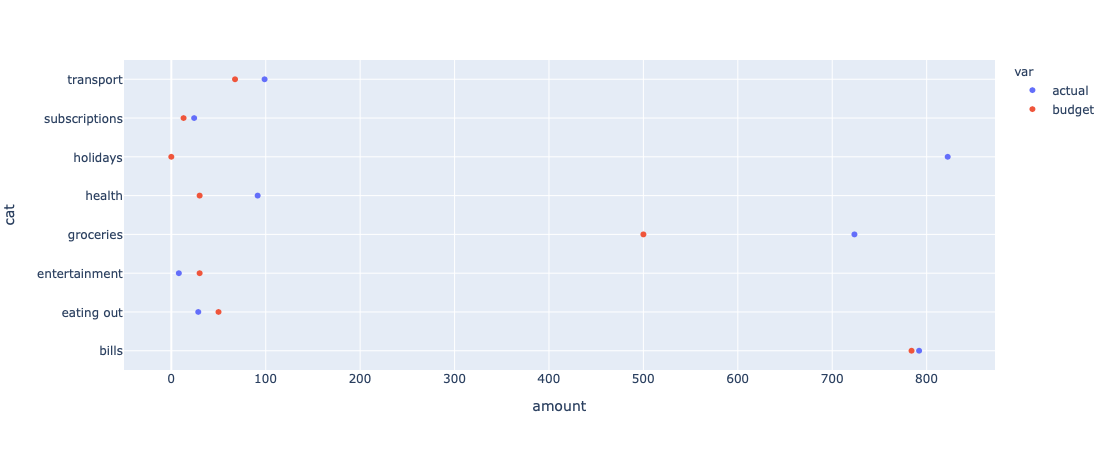

In [46]:
px.scatter(df, x='amount', y='cat', color='var')

# Resources

- Using Plotly for Jupyter Lab and Fastpages ([link](https://colab.research.google.com/github/binnisb/blog/blob/master/_notebooks/2020-04-02-Plotly-in-lab.ipynb#scrollTo=TWW5ogvQPEk1))